### Regression - Price Predict ###

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
X_test = load_dataset('test.csv')
X_train = load_dataset('train.csv')
y_test = load_dataset('y_test.csv')
y_train = load_dataset('y_train.csv')

X_train = X_train[:-1]
X_test = X_test[:-1]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(10497, 16)
(10497, 1)
(4499, 16)
(4499, 1)


In [2]:
#agrupem i visualitzem les dades test
test=X_test.assign(Price=y_test)
test.head()
test.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
count,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000
mean,2.849,1.107,1.399,2.937,1.486,3.426,52.365,4.889,2.820,18.010,2.993,0.843,0.157,0.778,0.217,0.006,130.806
std,1.230,0.299,0.826,8.796,0.905,11.313,0.016,0.035,5.115,34.887,1.590,0.364,0.364,0.416,0.412,0.074,63.967
min,1.000,0.000,0.000,1.000,1.000,0.000,52.291,4.775,1.000,0.000,0.213,0.000,0.000,0.000,0.000,0.000,23.000
25%,2.000,1.000,1.000,1.000,1.000,1.000,52.356,4.864,2.000,2.000,1.949,1.000,0.000,1.000,0.000,0.000,89.000
50%,2.000,1.000,1.000,1.000,1.000,1.000,52.365,4.887,2.000,7.000,2.854,1.000,0.000,1.000,0.000,0.000,117.000
75%,4.000,1.000,2.000,1.000,2.000,1.000,52.375,4.908,3.000,18.000,3.577,1.000,0.000,1.000,0.000,0.000,150.000
max,16.000,4.000,10.000,91.000,16.000,106.000,52.425,5.028,180.000,408.000,11.593,1.000,1.000,1.000,1.000,1.000,433.000


In [3]:
#agrupem i visualitzem les dades train
train=X_train.assign(Price=y_train)
train.head()
#train.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
0,4,2.000,2.000,1,1,1.000,52.358,4.934,2,8,3.279,1,0,1,0,0,120.000
1,4,1.000,2.000,1,2,1.000,52.364,4.983,3,0,5.952,1,0,1,0,0,99.000
2,2,1.000,1.000,1,1,1.000,52.375,4.862,3,8,2.601,1,0,1,0,0,100.000
3,2,1.000,1.000,1,1,1.000,52.387,4.890,2,41,1.095,1,0,0,1,0,175.000
4,2,1.000,1.000,1,1,1.000,52.384,4.890,3,0,0.844,1,0,1,0,0,119.000


Comencem amb el pre-processament

In [4]:
# Traiem la columna 'instant_bookable_f', ja que és redundant amb 'instant_bookable_t'
train=train.drop(['instant_bookable_f'], axis=1)
test=test.drop(['instant_bookable_f'], axis=1)
X_train=X_train.drop(['instant_bookable_f'], axis=1)
X_test=X_test.drop(['instant_bookable_f'], axis=1)

<IPython.core.display.Javascript object>


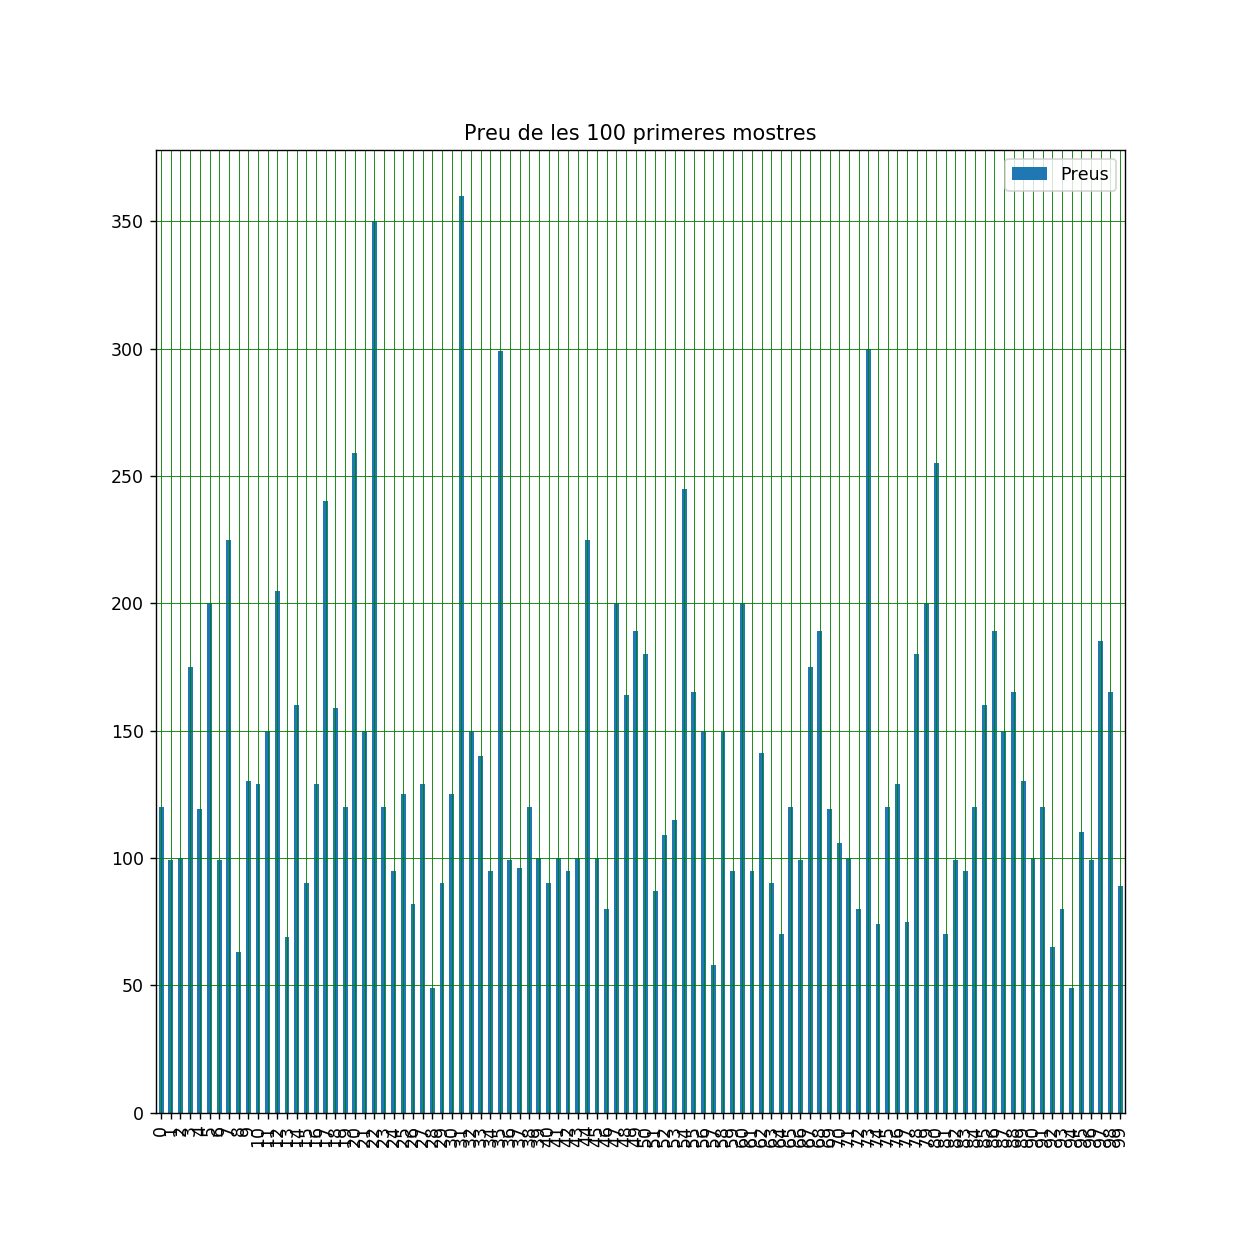

In [5]:
df = y_train
df = df.rename(columns={'160.0' : 'Preus'})
df
df1 = df.head(100)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Preu de les 100 primeres mostres")
plt.show()
plt.savefig("Grafic Preus.jpg")

In [6]:
# mirem si hi ha valors nulls
train.isnull().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
calculated_host_listings_count    0
guests_included                   0
host_listings_count               0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
d_centre                          0
instant_bookable_t                0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
Price                             0
dtype: int64

In [7]:
# mirem que no té cap null
train.notnull().sum()

accommodates                      10497
bathrooms                         10497
bedrooms                          10497
calculated_host_listings_count    10497
guests_included                   10497
host_listings_count               10497
latitude                          10497
longitude                         10497
minimum_nights                    10497
number_of_reviews                 10497
d_centre                          10497
instant_bookable_t                10497
room_type_Entire home/apt         10497
room_type_Private room            10497
room_type_Shared room             10497
Price                             10497
dtype: int64

In [8]:
# mirem si te NaN's
train.isna().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
calculated_host_listings_count    0
guests_included                   0
host_listings_count               0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
d_centre                          0
instant_bookable_t                0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
Price                             0
dtype: int64

In [9]:
# mirem la correlació de les dades amb el preu
train.corr()['Price']

accommodates                     -0.002
bathrooms                         0.002
bedrooms                         -0.005
calculated_host_listings_count   -0.002
guests_included                   0.012
host_listings_count              -0.004
latitude                          0.010
longitude                         0.015
minimum_nights                   -0.005
number_of_reviews                 0.003
d_centre                         -0.014
instant_bookable_t                0.003
room_type_Entire home/apt         0.003
room_type_Private room           -0.000
room_type_Shared room            -0.019
Price                             1.000
Name: Price, dtype: float64

In [10]:
corr = train.corr()
priceCorr = corr.Price.sort_values(ascending = False)
print('Most Positive Correlations\n',priceCorr.head(),'\n')
print('Most Negative Correlations\n', priceCorr.tail())

Most Positive Correlations
 Price                1.000
longitude            0.015
guests_included      0.012
latitude             0.010
instant_bookable_t   0.003
Name: Price, dtype: float64 

Most Negative Correlations
 host_listings_count     -0.004
bedrooms                -0.005
minimum_nights          -0.005
d_centre                -0.014
room_type_Shared room   -0.019
Name: Price, dtype: float64


<IPython.core.display.Javascript object>


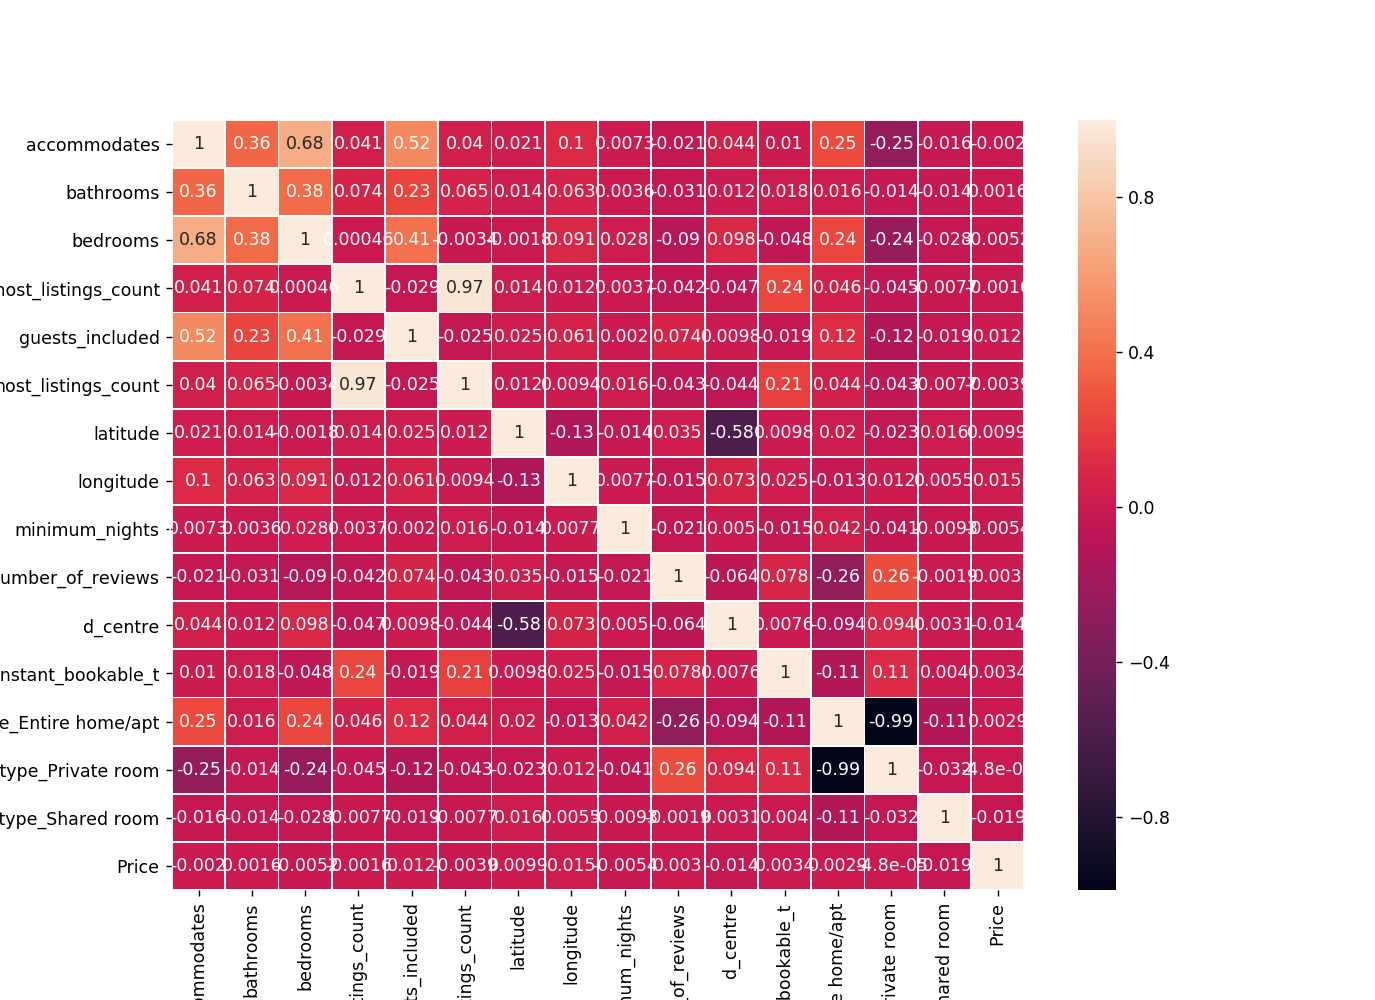

In [11]:
import seaborn as sns

#Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = train.corr()

plt.figure(figsize=(11,8))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)



Primer fem la predicció amb les dades no normalitzades

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
import matplotlib.pyplot as plt

In [13]:
#split by the most correlated features
X_Correlated_train =pd.DataFrame(X_train, columns=['longitude', 'guests_included', 'latitude', 'room_type_Shared room', 'd_centre'])
X_Correlated_test =pd.DataFrame(X_test, columns=['longitude', 'guests_included', 'latitude', 'room_type_Shared room', 'd_centre'])

print("shape correlated train: ", X_Correlated_train.shape)
print("shape correlated test: ", X_Correlated_test.shape)

X_Most_Correlated_train =pd.DataFrame(X_train, columns=['room_type_Shared room'])
X_Most_Correlated_test =pd.DataFrame(X_test, columns=['room_type_Shared room'])


shape correlated train:  (10497, 5)
shape correlated test:  (4499, 5)


1. Linear Regression multiple.

In [14]:
# Linear regression with all features

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

y_train_predicted = linear_regression.predict(X_train)
y_test_predicted = linear_regression.predict(X_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted)
train_R2 = r2_score(y_train, y_train_predicted)
test_MSD = mean_squared_error(y_test, y_test_predicted)
test_R2 = r2_score(y_test, y_test_predicted)


print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


Error mitjà d'entrenament:  4059.9299955221477
Error mitjà de test:  4102.732010893085
R2 d'entrenament:  0.0012167583713048602
R2 de test:  -0.002906164877447992


In [15]:
# Linear regression with correlated features

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_Correlated_train, y_train)

y_train_predicted_Correlated = linear_regression.predict(X_Correlated_train)
y_test_predicted_Correlated = linear_regression.predict(X_Correlated_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted_Correlated)
train_R2 = r2_score(y_train, y_train_predicted_Correlated)
test_MSD = mean_squared_error(y_test, y_test_predicted_Correlated)
test_R2 = r2_score(y_test, y_test_predicted_Correlated)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


Error mitjà d'entrenament:  4061.0384570514393
Error mitjà de test:  4097.2402595991525
R2 d'entrenament:  0.0009440657877708425
R2 de test:  -0.0015637152087795148


In [16]:
# Linear regression with the most correlated feature

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_Most_Correlated_train, y_train)

y_train_predicted_Most_Correlated = linear_regression.predict(X_Most_Correlated_train)
y_test_predicted_Most_Correlated = linear_regression.predict(X_Most_Correlated_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted_Most_Correlated)
train_R2 = r2_score(y_train, y_train_predicted_Most_Correlated)
test_MSD = mean_squared_error(y_test, y_test_predicted_Most_Correlated)
test_R2 = r2_score(y_test, y_test_predicted_Most_Correlated)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


Error mitjà d'entrenament:  4063.3785989309526
Error mitjà de test:  4092.6517783808813
R2 d'entrenament:  0.0003683675627104144
R2 de test:  -0.0004420684404771169


In [17]:
df = y_test.assign(y_predicted=y_test_predicted, y_predicted_correlated=y_test_predicted_Correlated, y_predicted_most_correlated = y_test_predicted_Most_Correlated)
df = df.rename(columns={'59.0' : 'y_real'})
df

,y_real,y_predicted,y_predicted_correlated,y_predicted_most_correlated
0,148.000,129.399,129.316,129.805
1,134.000,131.024,130.784,129.805
2,195.000,128.535,131.668,129.805
3,80.000,123.359,124.308,129.805
4,120.000,131.011,130.606,129.805
5,99.000,127.345,127.887,129.805
6,60.000,129.083,128.482,129.805
7,280.000,130.350,129.151,129.805
8,275.000,129.567,130.966,129.805
9,189.000,122.029,123.680,129.805


<IPython.core.display.Javascript object>


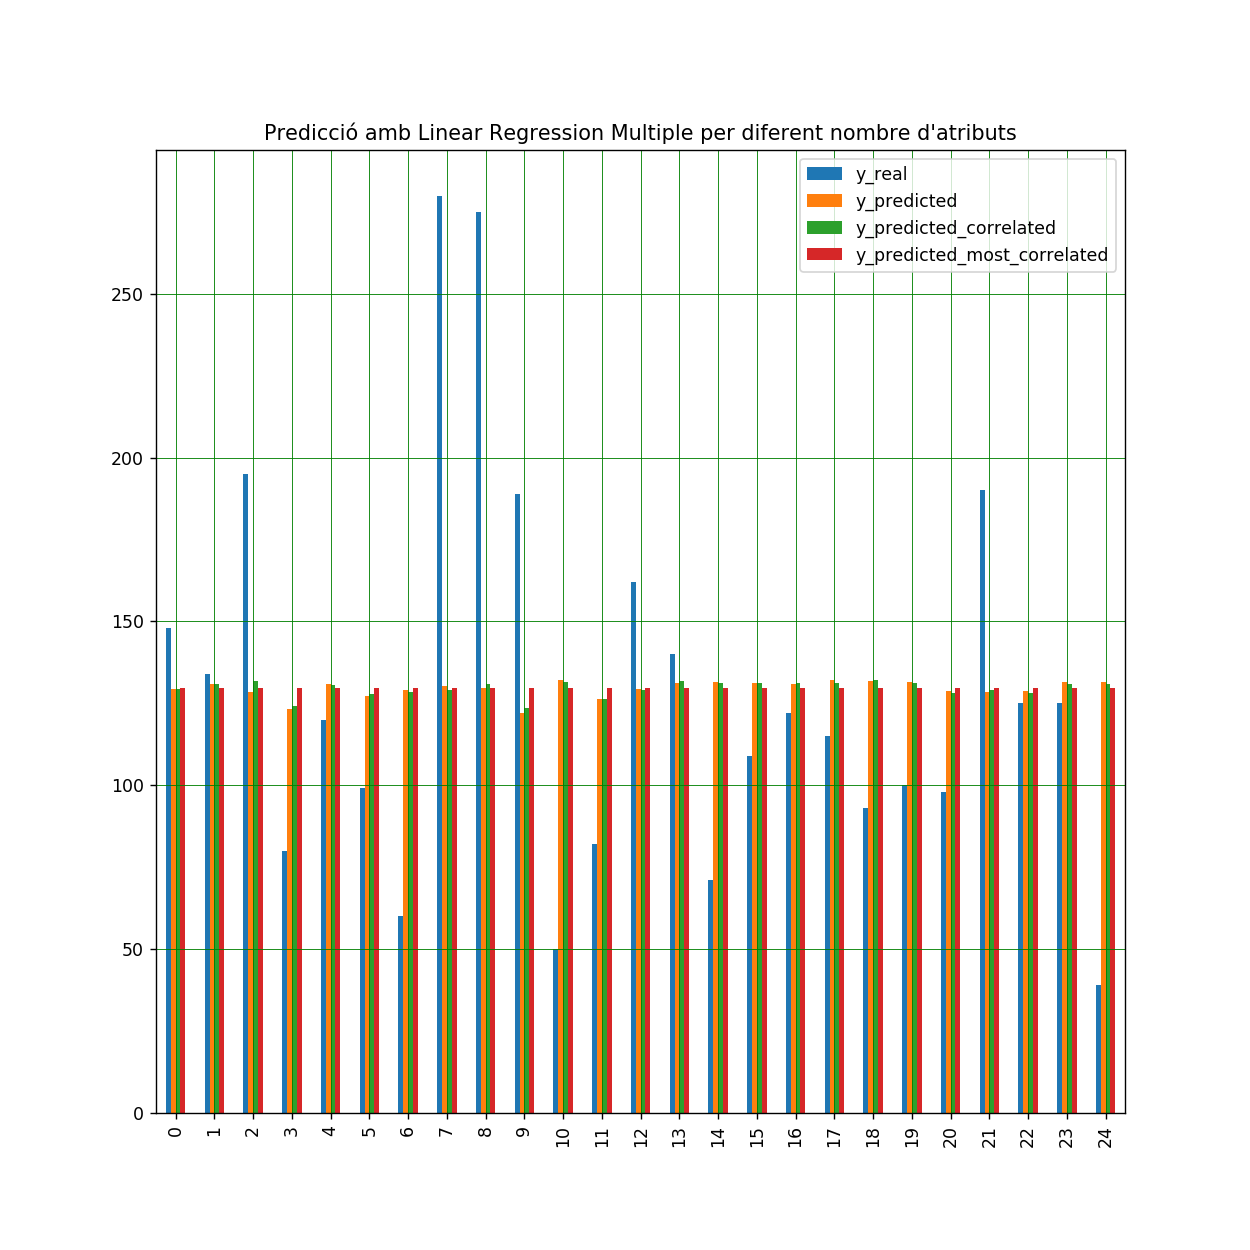

In [18]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Predicció amb Linear Regression Multiple per diferent nombre d'atributs")
plt.show()
plt.savefig("Linear .jpg")

2. Multifeature polinomial regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [20]:
#Multi-featrues polinomial regression with all the featrues

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)


Error mitjà d'entrenament:  4027.3645482780344
Error mitjà de test:  4133.444444979104
R2 d'entrenament:  0.009228182952378372
R2 de test:  -0.010413769420342778


In [21]:
#Multi-featrues polinomial regression with correlated featrues

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_Correlated_train)
X_poly_test = poly.fit_transform(X_Correlated_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted_Correlated = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted_Correlated = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted_Correlated)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted_Correlated)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted_Correlated)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted_Correlated)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)



Error mitjà d'entrenament:  4058.0030998577786
Error mitjà de test:  4105.4640064505975
R2 d'entrenament:  0.0016907939088786073
R2 de test:  -0.0035739967464980538


In [22]:
#Multi-featrues polinomial regression with the most correlated featrue

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_Most_Correlated_train)
X_poly_test = poly.fit_transform(X_Most_Correlated_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted_Most_Correlated = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted_Most_Correlated = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted_Most_Correlated)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted_Most_Correlated)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted_Most_Correlated)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted_Most_Correlated)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)


Error mitjà d'entrenament:  4063.3785989309526
Error mitjà de test:  4092.6517783808813
R2 d'entrenament:  0.0003683675627104144
R2 de test:  -0.0004420684404771169


In [23]:
df = y_test.assign(y_predicted=poly_test_y_predicted, y_predicted_correlated=poly_test_y_predicted_Correlated, y_predicted_most_correlated = poly_test_y_predicted_Most_Correlated)
df = df.rename(columns={'59.0' : 'y_real'})
df

,y_real,y_predicted,y_predicted_correlated,y_predicted_most_correlated
0,148.000,126.546,127.589,129.805
1,134.000,131.812,131.536,129.805
2,195.000,125.009,130.667,129.805
3,80.000,123.225,122.563,129.805
4,120.000,128.596,128.864,129.805
5,99.000,126.166,128.701,129.805
6,60.000,129.744,128.999,129.805
7,280.000,131.511,128.416,129.805
8,275.000,127.994,131.398,129.805
9,189.000,125.401,120.465,129.805


<IPython.core.display.Javascript object>


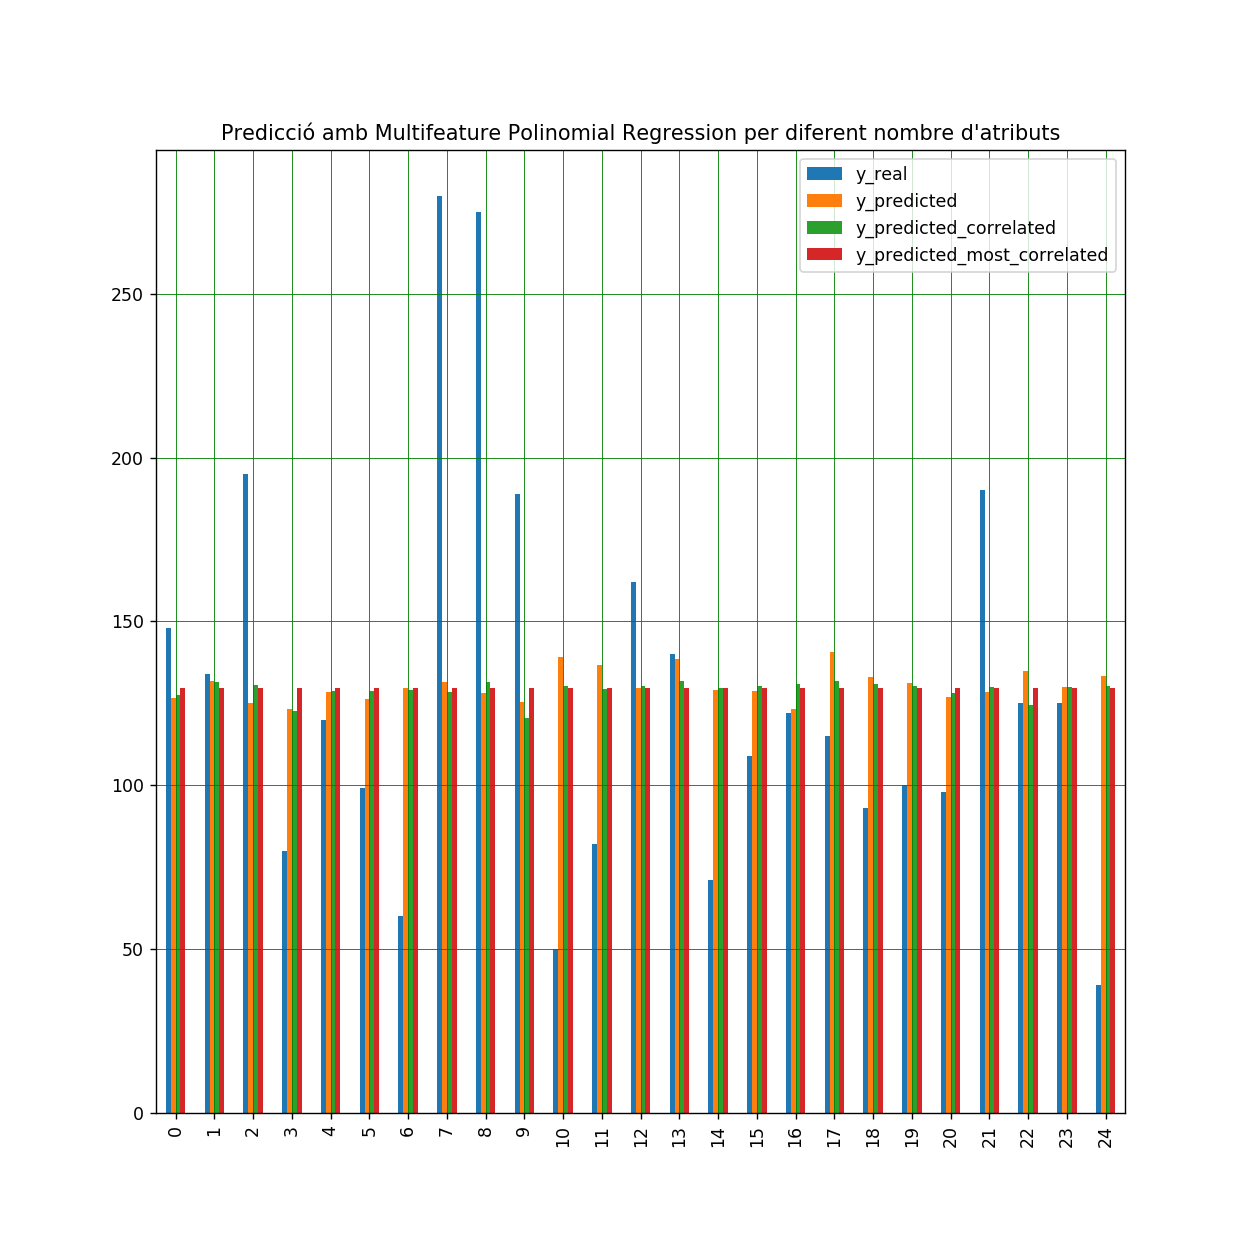

In [24]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Predicció amb Multifeature Polinomial Regression per diferent nombre d'atributs")
plt.show()

El resultat obtingut és amb polinomis de grau 2, i veiem que és pitjor que amb un regressor lineal. I si augmentem els graus pitjor és el resultat fins al punt que no es pot calcular (grau 4)

3. KNN regressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor
accuracy_test=[]
accuracy_train=[]
test_MSD=[]
train_MSD=[]
num=[]
for i in range(1,50,2):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train, y_train) 
    test_predicted = KNN.predict(X_test)
    train_predicted = KNN.predict(X_train)
    num.append(i)
    test_MSD.append(mean_squared_error(y_test, test_predicted))
    train_MSD.append(mean_squared_error(y_train, train_predicted))

<IPython.core.display.Javascript object>


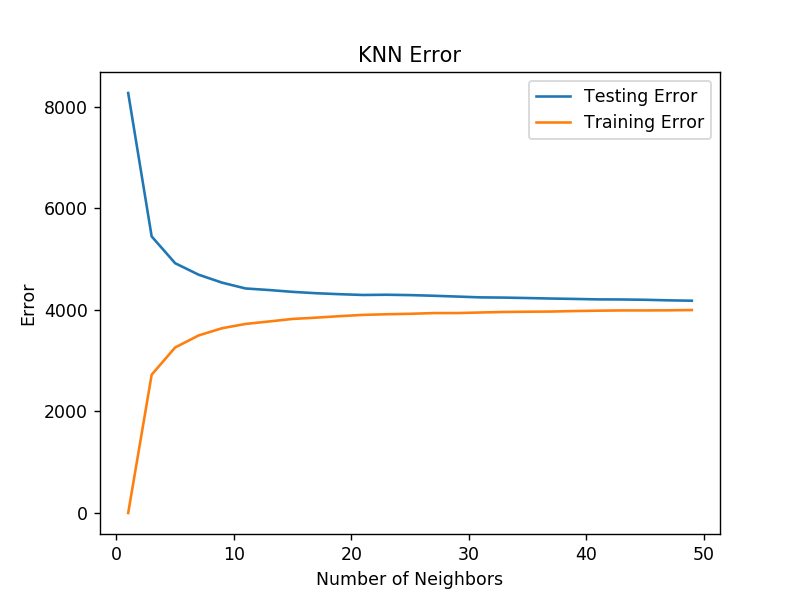

In [26]:
plt.figure()
plt.title('KNN Error')
plt.plot(num, test_MSD, label = 'Testing Error')
plt.plot(num, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
random_forest = RandomForestRegressor() 
random_forest.fit(X_train, y_train)
test_predicted = random_forest.predict(X_test) 
train_predicted = random_forest.predict(X_train) 
test_predicted=test_predicted.reshape(-1,1)
train_predicted=train_predicted.reshape(-1,1)

train_MSD = mean_squared_error(y_train, train_predicted)
train_R2 = r2_score(y_train, train_predicted)
test_MSD = mean_squared_error(y_test, test_predicted)
test_R2 = r2_score(y_test, test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Error mitjà d'entrenament:  854.3422234924265
Error mitjà de test:  4659.260846854856
R2 d'entrenament:  0.7898232983373672
R2 de test:  -0.13894873335040847


In [29]:
random_forest = RandomForestRegressor() 
random_forest.fit(X_Correlated_train, y_train)
Correlated_test_predicted = random_forest.predict(X_Correlated_test) 
Correlated_train_predicted = random_forest.predict(X_Correlated_train) 
Correlated_test_predicted=Correlated_test_predicted.reshape(-1,1)
Correlated_train_predicted=Correlated_train_predicted.reshape(-1,1)

train_MSD = mean_squared_error(y_train, Correlated_train_predicted)
train_R2 = r2_score(y_train, Correlated_train_predicted)
test_MSD = mean_squared_error(y_test, Correlated_test_predicted)
test_R2 = r2_score(y_test, Correlated_test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Error mitjà d'entrenament:  910.2288844431743
Error mitjà de test:  4998.488528561903
R2 d'entrenament:  0.7760746227568137
R2 de test:  -0.22187238821691868


In [30]:
random_forest = RandomForestRegressor() 
random_forest.fit(X_Most_Correlated_train, y_train)
Most_Correlated_test_predicted = random_forest.predict(X_Most_Correlated_test) 
Most_Correlated_train_predicted = random_forest.predict(X_Most_Correlated_train) 
Most_Correlated_test_predicted = Most_Correlated_test_predicted.reshape(-1,1)
Most_Correlated_train_predicted = Most_Correlated_train_predicted.reshape(-1,1)

train_MSD = mean_squared_error(y_train, Most_Correlated_train_predicted)
train_R2 = r2_score(y_train, Most_Correlated_train_predicted)
test_MSD = mean_squared_error(y_test, Most_Correlated_test_predicted)
test_R2 = r2_score(y_test, Most_Correlated_test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


Error mitjà d'entrenament:  4063.4681610904627
Error mitjà de test:  4092.6974915732185
R2 d'entrenament:  0.00034633437886211205
R2 de test:  -0.0004532429559680473


C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [31]:
df = y_test.assign(y_predicted=test_predicted, y_predicted_correlated=Correlated_test_predicted, y_predicted_most_correlated = Most_Correlated_test_predicted)
df = df.rename(columns={'59.0' : 'y_real'})
df

,y_real,y_predicted,y_predicted_correlated,y_predicted_most_correlated
0,148.000,125.300,83.600,130.047
1,134.000,105.200,125.800,130.047
2,195.000,161.400,174.400,130.047
3,80.000,129.400,82.800,130.047
4,120.000,125.700,153.500,130.047
5,99.000,86.300,143.500,130.047
6,60.000,98.700,114.900,130.047
7,280.000,135.300,164.700,130.047
8,275.000,96.800,89.900,130.047
9,189.000,130.800,215.400,130.047


<IPython.core.display.Javascript object>


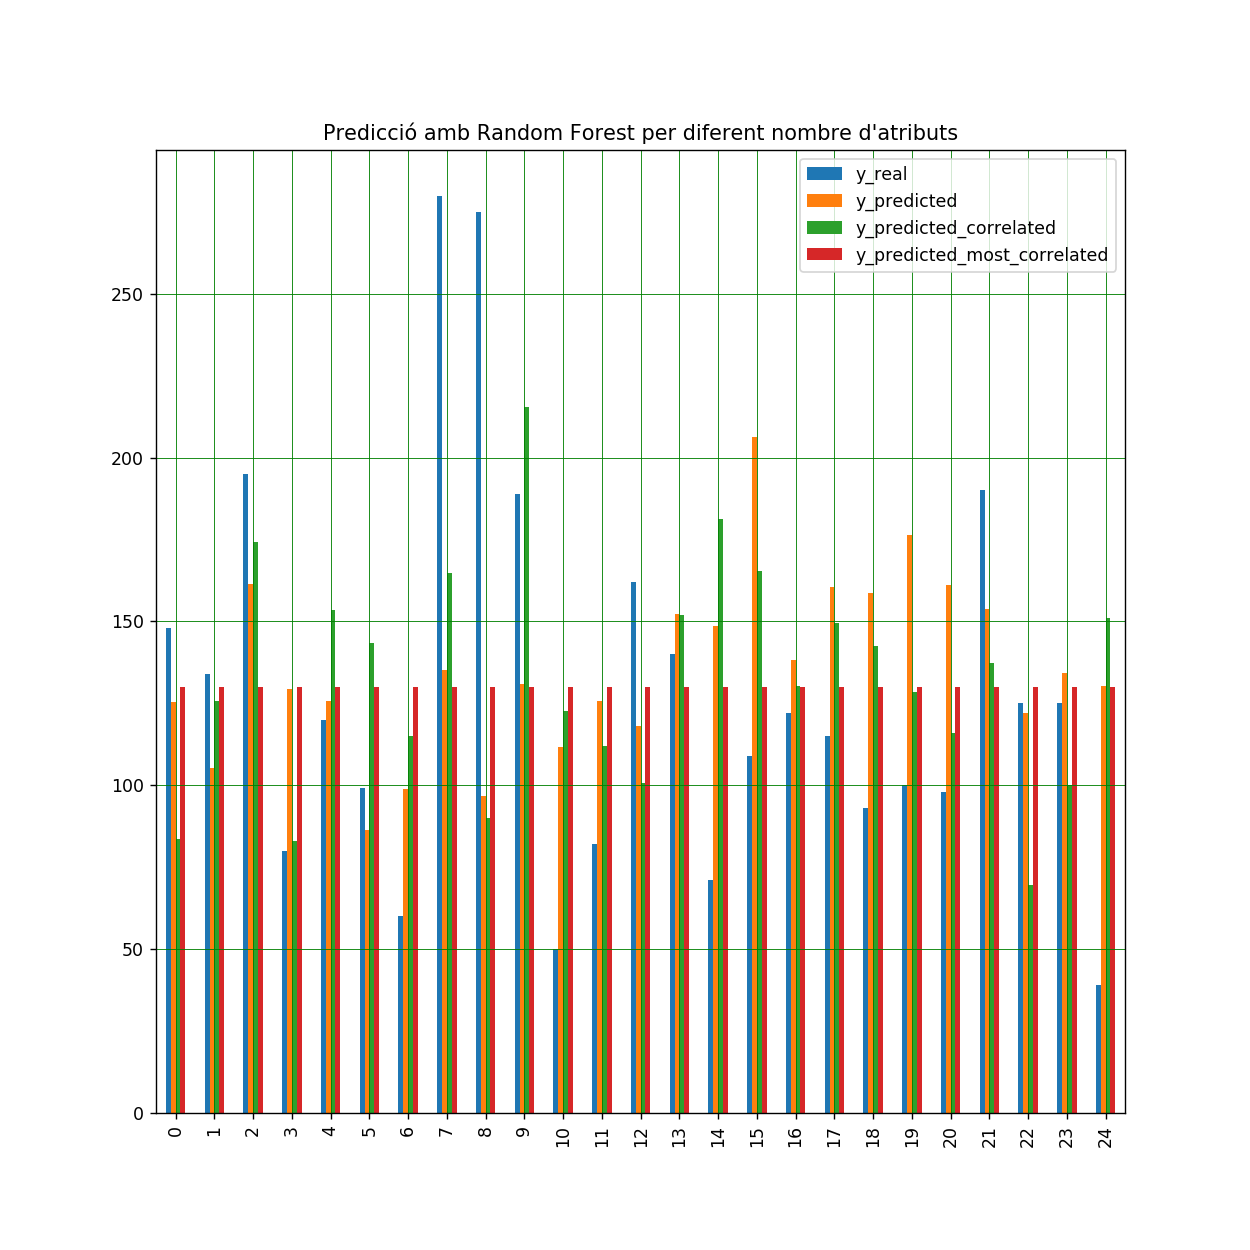

In [32]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Predicció amb Random Forest per diferent nombre d'atributs")
plt.savefig("RF.jpg")
plt.show()

In [33]:
train_MSD=[]
train_R2=[]
test_MSD=[]
test_R2=[]
max_depths=list(range(1,60))
for max_depth in max_depths: 
    random_forest = RandomForestRegressor(max_depth=max_depth)
    random_forest.fit(X_Most_Correlated_train, y_train)
    Most_Correlated_test_predicted = random_forest.predict(X_Most_Correlated_test) 
    Most_Correlated_train_predicted = random_forest.predict(X_Most_Correlated_train) 
    Most_Correlated_test_predicted = Most_Correlated_test_predicted.reshape(-1,1)
    Most_Correlated_train_predicted = Most_Correlated_train_predicted.reshape(-1,1)

    train_MSD.append(mean_squared_error(y_train, Most_Correlated_train_predicted))
    train_R2.append(r2_score(y_train, Most_Correlated_train_predicted))
    test_MSD.append(mean_squared_error(y_test, Most_Correlated_test_predicted))
    test_R2.append(r2_score(y_test, Most_Correlated_test_predicted))
    

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarni

C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarn

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarni

In [34]:
len(max_depths)

59

<IPython.core.display.Javascript object>


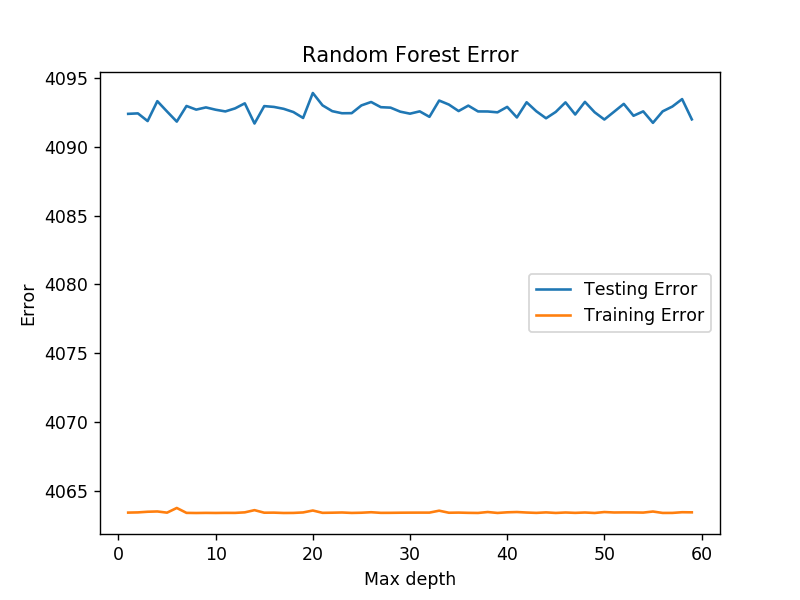

In [35]:
plt.figure()
plt.title('Random Forest Error')
plt.plot(max_depths, test_MSD, label = 'Testing Error')
plt.plot(max_depths, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Error')
plt.show()
plt.savefig("Random_Forest_Error_MaxDepth.jpg")

59


<IPython.core.display.Javascript object>


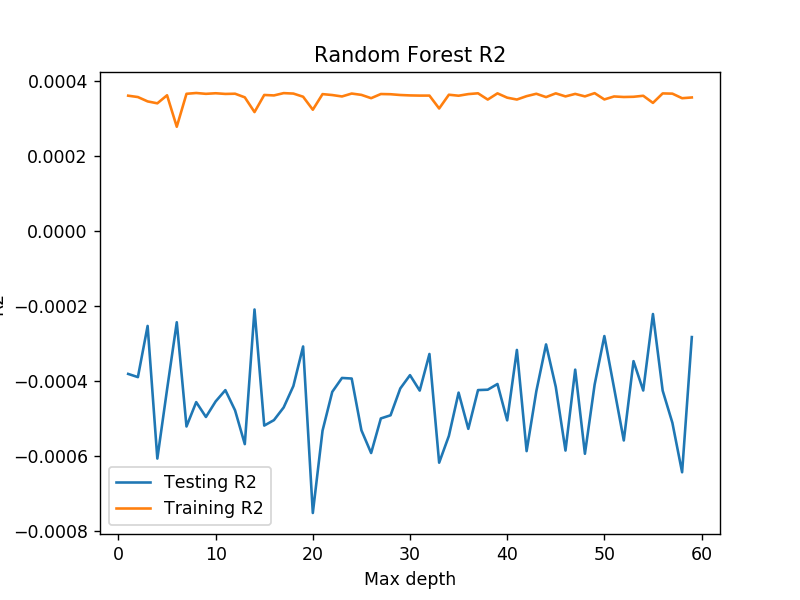

In [36]:
print(len(test_R2))
plt.figure()
plt.title('Random Forest R2')
plt.plot(max_depths, test_R2, label = 'Testing R2')
plt.plot(max_depths, train_R2, label = 'Training R2')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('R2')
plt.show()
plt.savefig("Random_Forest_R2_MaxDepth.jpg")

In [37]:
train_MSD=[]
train_R2=[]
test_MSD=[]
test_R2=[]
num_trees=list(range(3,60))
for trees in num_trees:    
    random_forest = RandomForestRegressor(n_estimators=trees) 
    random_forest.fit(X_Most_Correlated_train, y_train)
    Most_Correlated_test_predicted = random_forest.predict(X_Most_Correlated_test) 
    Most_Correlated_train_predicted = random_forest.predict(X_Most_Correlated_train) 
    Most_Correlated_test_predicted = Most_Correlated_test_predicted.reshape(-1,1)
    Most_Correlated_train_predicted = Most_Correlated_train_predicted.reshape(-1,1)

    train_MSD.append(mean_squared_error(y_train, Most_Correlated_train_predicted))
    train_R2.append(r2_score(y_train, Most_Correlated_train_predicted))
    test_MSD.append(mean_squared_error(y_test, Most_Correlated_test_predicted))
    test_R2.append(r2_score(y_test, Most_Correlated_test_predicted))



C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A col

C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A col

<IPython.core.display.Javascript object>


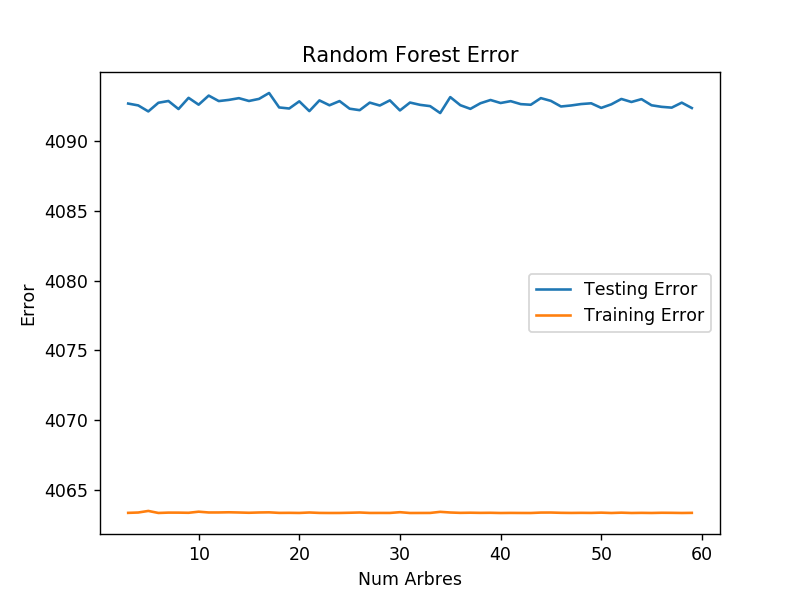

In [38]:
plt.figure()
plt.title('Random Forest Error')
plt.plot(num_trees, test_MSD, label = 'Testing Error')
plt.plot(num_trees, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Num Arbres')
plt.ylabel('Error')
plt.show()
plt.savefig("Random_Forest_Error_NArbres.jpg")

<IPython.core.display.Javascript object>


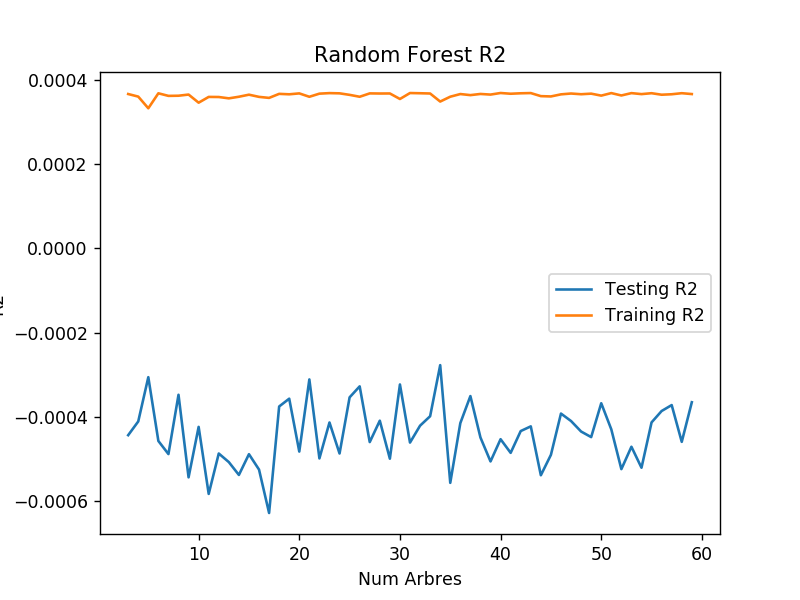

In [39]:
plt.figure()
plt.title('Random Forest R2')
plt.plot(num_trees, test_R2, label = 'Testing R2')
plt.plot(num_trees, train_R2, label = 'Training R2')
plt.legend()
plt.xlabel('Num Arbres')
plt.ylabel('R2')
plt.show()
plt.savefig("Random_Forest_R2_NArbres.jpg")

In [40]:
# importing Pool
from catboost import Pool, CatBoostRegressor
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train,label=y_train)
#Creating pool object for test dataset
test_data = Pool(data=X_test,label=y_test)

In [41]:
#build model
cat_model = CatBoostRegressor(loss_function="RMSE")
# Fit model 
cat_model.fit( X_train, y_train,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.073655
0:	learn: 63.7437397	test: 63.9708473	best: 63.9708473 (0)	total: 169ms	remaining: 2m 48s
1:	learn: 63.7332138	test: 63.9731741	best: 63.9708473 (0)	total: 182ms	remaining: 1m 30s
2:	learn: 63.7149000	test: 63.9661916	best: 63.9661916 (2)	total: 191ms	remaining: 1m 3s
3:	learn: 63.7052583	test: 63.9683769	best: 63.9661916 (2)	total: 196ms	remaining: 48.9s
4:	learn: 63.6856427	test: 63.9672977	best: 63.9661916 (2)	total: 201ms	remaining: 40s
5:	learn: 63.6808481	test: 63.9656944	best: 63.9656944 (5)	total: 205ms	remaining: 33.9s
6:	learn: 63.6639420	test: 63.9677804	best: 63.9656944 (5)	total: 208ms	remaining: 29.6s
7:	learn: 63.6534005	test: 63.9738892	best: 63.9656944 (5)	total: 212ms	remaining: 26.3s
8:	learn: 63.6320316	test: 63.9795325	best: 63.9656944 (5)	total: 215ms	remaining: 23.7s
9:	learn: 63.6062272	test: 63.9763736	best: 63.9656944 (5)	total: 218ms	remaining: 21.6s
10:	learn: 63.5976801	test: 63.9734527	best: 63.9656944 (5)	total: 222ms	remaini

105:	learn: 62.6189310	test: 64.1314831	best: 63.9656944 (5)	total: 531ms	remaining: 4.48s
106:	learn: 62.6101834	test: 64.1317304	best: 63.9656944 (5)	total: 534ms	remaining: 4.46s
107:	learn: 62.6092980	test: 64.1320366	best: 63.9656944 (5)	total: 537ms	remaining: 4.44s
108:	learn: 62.5989185	test: 64.1376653	best: 63.9656944 (5)	total: 541ms	remaining: 4.42s
109:	learn: 62.5899987	test: 64.1376059	best: 63.9656944 (5)	total: 545ms	remaining: 4.41s
110:	learn: 62.5842967	test: 64.1368430	best: 63.9656944 (5)	total: 548ms	remaining: 4.39s
111:	learn: 62.5819403	test: 64.1382194	best: 63.9656944 (5)	total: 552ms	remaining: 4.38s
112:	learn: 62.5745925	test: 64.1390118	best: 63.9656944 (5)	total: 555ms	remaining: 4.36s
113:	learn: 62.5654306	test: 64.1431892	best: 63.9656944 (5)	total: 559ms	remaining: 4.34s
114:	learn: 62.5557376	test: 64.1365492	best: 63.9656944 (5)	total: 562ms	remaining: 4.33s
115:	learn: 62.5488788	test: 64.1350538	best: 63.9656944 (5)	total: 566ms	remaining: 4.31s

231:	learn: 60.8960267	test: 64.3026010	best: 63.9656944 (5)	total: 1.04s	remaining: 3.44s
232:	learn: 60.8873559	test: 64.3013063	best: 63.9656944 (5)	total: 1.04s	remaining: 3.44s
233:	learn: 60.8770186	test: 64.3061781	best: 63.9656944 (5)	total: 1.05s	remaining: 3.43s
234:	learn: 60.8668754	test: 64.3102686	best: 63.9656944 (5)	total: 1.05s	remaining: 3.43s
235:	learn: 60.8557758	test: 64.3144427	best: 63.9656944 (5)	total: 1.06s	remaining: 3.42s
236:	learn: 60.8424418	test: 64.3176866	best: 63.9656944 (5)	total: 1.06s	remaining: 3.41s
237:	learn: 60.8303491	test: 64.3216602	best: 63.9656944 (5)	total: 1.06s	remaining: 3.41s
238:	learn: 60.8089387	test: 64.3197520	best: 63.9656944 (5)	total: 1.07s	remaining: 3.4s
239:	learn: 60.8035033	test: 64.3193571	best: 63.9656944 (5)	total: 1.07s	remaining: 3.39s
240:	learn: 60.7893695	test: 64.3209313	best: 63.9656944 (5)	total: 1.08s	remaining: 3.39s
241:	learn: 60.7767502	test: 64.3213196	best: 63.9656944 (5)	total: 1.08s	remaining: 3.39s


355:	learn: 59.4013105	test: 64.5591577	best: 63.9656944 (5)	total: 1.54s	remaining: 2.78s
356:	learn: 59.3909146	test: 64.5575566	best: 63.9656944 (5)	total: 1.54s	remaining: 2.78s
357:	learn: 59.3727557	test: 64.5580071	best: 63.9656944 (5)	total: 1.55s	remaining: 2.77s
358:	learn: 59.3504743	test: 64.5556308	best: 63.9656944 (5)	total: 1.55s	remaining: 2.77s
359:	learn: 59.3449737	test: 64.5582197	best: 63.9656944 (5)	total: 1.55s	remaining: 2.76s
360:	learn: 59.3391183	test: 64.5607071	best: 63.9656944 (5)	total: 1.56s	remaining: 2.76s
361:	learn: 59.3262814	test: 64.5612602	best: 63.9656944 (5)	total: 1.56s	remaining: 2.75s
362:	learn: 59.3169918	test: 64.5626925	best: 63.9656944 (5)	total: 1.57s	remaining: 2.75s
363:	learn: 59.3040316	test: 64.5661906	best: 63.9656944 (5)	total: 1.57s	remaining: 2.75s
364:	learn: 59.2887777	test: 64.5712849	best: 63.9656944 (5)	total: 1.57s	remaining: 2.74s
365:	learn: 59.2777842	test: 64.5792703	best: 63.9656944 (5)	total: 1.58s	remaining: 2.74s

478:	learn: 58.1812394	test: 64.7639601	best: 63.9656944 (5)	total: 2.04s	remaining: 2.22s
479:	learn: 58.1629564	test: 64.7652290	best: 63.9656944 (5)	total: 2.05s	remaining: 2.22s
480:	learn: 58.1545109	test: 64.7657190	best: 63.9656944 (5)	total: 2.05s	remaining: 2.21s
481:	learn: 58.1375799	test: 64.7632758	best: 63.9656944 (5)	total: 2.06s	remaining: 2.21s
482:	learn: 58.1251152	test: 64.7675184	best: 63.9656944 (5)	total: 2.06s	remaining: 2.21s
483:	learn: 58.1178351	test: 64.7670463	best: 63.9656944 (5)	total: 2.06s	remaining: 2.2s
484:	learn: 58.1089837	test: 64.7680337	best: 63.9656944 (5)	total: 2.07s	remaining: 2.2s
485:	learn: 58.1051243	test: 64.7672612	best: 63.9656944 (5)	total: 2.07s	remaining: 2.19s
486:	learn: 58.0967662	test: 64.7659740	best: 63.9656944 (5)	total: 2.08s	remaining: 2.19s
487:	learn: 58.0848770	test: 64.7715491	best: 63.9656944 (5)	total: 2.08s	remaining: 2.18s
488:	learn: 58.0747395	test: 64.7747516	best: 63.9656944 (5)	total: 2.09s	remaining: 2.18s
4

569:	learn: 57.3342876	test: 64.9203581	best: 63.9656944 (5)	total: 2.38s	remaining: 1.8s
570:	learn: 57.3286817	test: 64.9217801	best: 63.9656944 (5)	total: 2.39s	remaining: 1.79s
571:	learn: 57.3251863	test: 64.9221039	best: 63.9656944 (5)	total: 2.39s	remaining: 1.79s
572:	learn: 57.3128137	test: 64.9284015	best: 63.9656944 (5)	total: 2.39s	remaining: 1.78s
573:	learn: 57.3061294	test: 64.9323396	best: 63.9656944 (5)	total: 2.4s	remaining: 1.78s
574:	learn: 57.2983416	test: 64.9350133	best: 63.9656944 (5)	total: 2.4s	remaining: 1.77s
575:	learn: 57.2865090	test: 64.9348112	best: 63.9656944 (5)	total: 2.4s	remaining: 1.77s
576:	learn: 57.2863477	test: 64.9346458	best: 63.9656944 (5)	total: 2.41s	remaining: 1.76s
577:	learn: 57.2781499	test: 64.9336464	best: 63.9656944 (5)	total: 2.41s	remaining: 1.76s
578:	learn: 57.2610721	test: 64.9409736	best: 63.9656944 (5)	total: 2.41s	remaining: 1.75s
579:	learn: 57.2543555	test: 64.9415658	best: 63.9656944 (5)	total: 2.42s	remaining: 1.75s
580

661:	learn: 56.5553887	test: 65.0423776	best: 63.9656944 (5)	total: 2.75s	remaining: 1.4s
662:	learn: 56.5390181	test: 65.0423820	best: 63.9656944 (5)	total: 2.76s	remaining: 1.4s
663:	learn: 56.5239563	test: 65.0381584	best: 63.9656944 (5)	total: 2.77s	remaining: 1.4s
664:	learn: 56.5092493	test: 65.0352374	best: 63.9656944 (5)	total: 2.77s	remaining: 1.4s
665:	learn: 56.5010817	test: 65.0381446	best: 63.9656944 (5)	total: 2.77s	remaining: 1.39s
666:	learn: 56.4895484	test: 65.0369063	best: 63.9656944 (5)	total: 2.78s	remaining: 1.39s
667:	learn: 56.4817699	test: 65.0323875	best: 63.9656944 (5)	total: 2.78s	remaining: 1.38s
668:	learn: 56.4772990	test: 65.0322522	best: 63.9656944 (5)	total: 2.79s	remaining: 1.38s
669:	learn: 56.4735462	test: 65.0329499	best: 63.9656944 (5)	total: 2.79s	remaining: 1.37s
670:	learn: 56.4640113	test: 65.0337055	best: 63.9656944 (5)	total: 2.79s	remaining: 1.37s
671:	learn: 56.4544786	test: 65.0364650	best: 63.9656944 (5)	total: 2.79s	remaining: 1.36s
672

795:	learn: 55.4595399	test: 65.1778056	best: 63.9656944 (5)	total: 3.23s	remaining: 829ms
796:	learn: 55.4493693	test: 65.1789828	best: 63.9656944 (5)	total: 3.24s	remaining: 824ms
797:	learn: 55.4355294	test: 65.1826405	best: 63.9656944 (5)	total: 3.24s	remaining: 820ms
798:	learn: 55.4354772	test: 65.1825193	best: 63.9656944 (5)	total: 3.24s	remaining: 816ms
799:	learn: 55.4277231	test: 65.1836425	best: 63.9656944 (5)	total: 3.25s	remaining: 812ms
800:	learn: 55.4215582	test: 65.1898754	best: 63.9656944 (5)	total: 3.25s	remaining: 808ms
801:	learn: 55.4178165	test: 65.1895519	best: 63.9656944 (5)	total: 3.25s	remaining: 803ms
802:	learn: 55.4100810	test: 65.1909540	best: 63.9656944 (5)	total: 3.26s	remaining: 799ms
803:	learn: 55.4074618	test: 65.1899846	best: 63.9656944 (5)	total: 3.26s	remaining: 795ms
804:	learn: 55.4051898	test: 65.1906645	best: 63.9656944 (5)	total: 3.26s	remaining: 791ms
805:	learn: 55.3913461	test: 65.1936015	best: 63.9656944 (5)	total: 3.27s	remaining: 787ms

893:	learn: 54.7291532	test: 65.2743882	best: 63.9656944 (5)	total: 3.57s	remaining: 424ms
894:	learn: 54.7245442	test: 65.2755370	best: 63.9656944 (5)	total: 3.58s	remaining: 420ms
895:	learn: 54.7155381	test: 65.2729664	best: 63.9656944 (5)	total: 3.58s	remaining: 416ms
896:	learn: 54.7054157	test: 65.2739355	best: 63.9656944 (5)	total: 3.58s	remaining: 411ms
897:	learn: 54.6995115	test: 65.2769806	best: 63.9656944 (5)	total: 3.59s	remaining: 407ms
898:	learn: 54.6923580	test: 65.2767985	best: 63.9656944 (5)	total: 3.59s	remaining: 403ms
899:	learn: 54.6885182	test: 65.2780556	best: 63.9656944 (5)	total: 3.59s	remaining: 399ms
900:	learn: 54.6808159	test: 65.2764810	best: 63.9656944 (5)	total: 3.6s	remaining: 395ms
901:	learn: 54.6773794	test: 65.2785311	best: 63.9656944 (5)	total: 3.6s	remaining: 391ms
902:	learn: 54.6752523	test: 65.2812931	best: 63.9656944 (5)	total: 3.6s	remaining: 387ms
903:	learn: 54.6662865	test: 65.2869651	best: 63.9656944 (5)	total: 3.61s	remaining: 383ms
90

In [42]:
from sklearn.metrics import r2_score
y_predict= cat_model.predict(X_test)
#RMSE
MSE_test = mean_squared_error(y_test,y_predict)
#R2 Score
r2_test = r2_score(y_test,y_predict)
#print results
print("Evaluation on test data")
print("RMSE: {:.2f}".format(MSE_test))
print("R2: {:.2f}".format(r2_test))


Evaluation on test data
RMSE: 4091.61
R2: -0.00


Ara provarem els matiexos models però estandarditzant les dades per veure si hi ha algun canvi significatiu

In [43]:
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)
X_train_scaled=DataFrame(X_train_scaled, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_train_scaled=DataFrame(y_train_scaled, columns=["Price"])
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)
X_test_scaled=DataFrame(X_test_scaled, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_test_scaled=DataFrame(y_test_scaled, columns=["Price"])

In [44]:
X_train_scaled

,accommodates,bathrooms,bedrooms,host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookabled_t,room_type_Entire home/apt,type_Private room,type_Shared room
0,0.188,0.250,0.200,0.000,0.000,0.009,0.501,0.660,0.002,0.016,0.270,0.000,1.000,0.000,0.000
1,0.188,0.125,0.200,0.000,0.067,0.009,0.539,0.841,0.004,0.000,0.498,0.000,1.000,0.000,0.000
2,0.062,0.125,0.100,0.000,0.000,0.009,0.625,0.396,0.004,0.016,0.212,0.000,1.000,0.000,0.000
3,0.062,0.125,0.100,0.000,0.000,0.009,0.714,0.501,0.002,0.083,0.084,0.000,0.000,1.000,0.000
4,0.062,0.125,0.100,0.000,0.000,0.009,0.690,0.499,0.004,0.000,0.062,0.000,1.000,0.000,0.000
5,0.125,0.188,0.100,0.000,0.067,0.009,0.483,0.570,0.002,0.018,0.218,0.000,1.000,0.000,0.000
6,0.188,0.250,0.200,0.000,0.067,0.009,0.493,0.384,0.000,0.000,0.304,1.000,1.000,0.000,0.000
7,0.062,0.125,0.100,0.000,0.000,0.009,0.656,0.369,0.002,0.040,0.250,0.000,1.000,0.000,0.000
8,0.250,0.188,0.300,0.000,0.000,0.009,0.507,0.398,0.002,0.073,0.276,0.000,1.000,0.000,0.000
9,0.062,0.125,0.100,0.000,0.000,0.009,0.854,0.618,0.000,0.036,0.280,0.000,0.000,1.000,0.000


Error mitjà d'entrenament:  51859.334595598746
Error mitjà de test:  35320.168537452766
R2 d'entrenament:  -11.757913159396171
R2 de test:  -7.6339577327184465


<IPython.core.display.Javascript object>


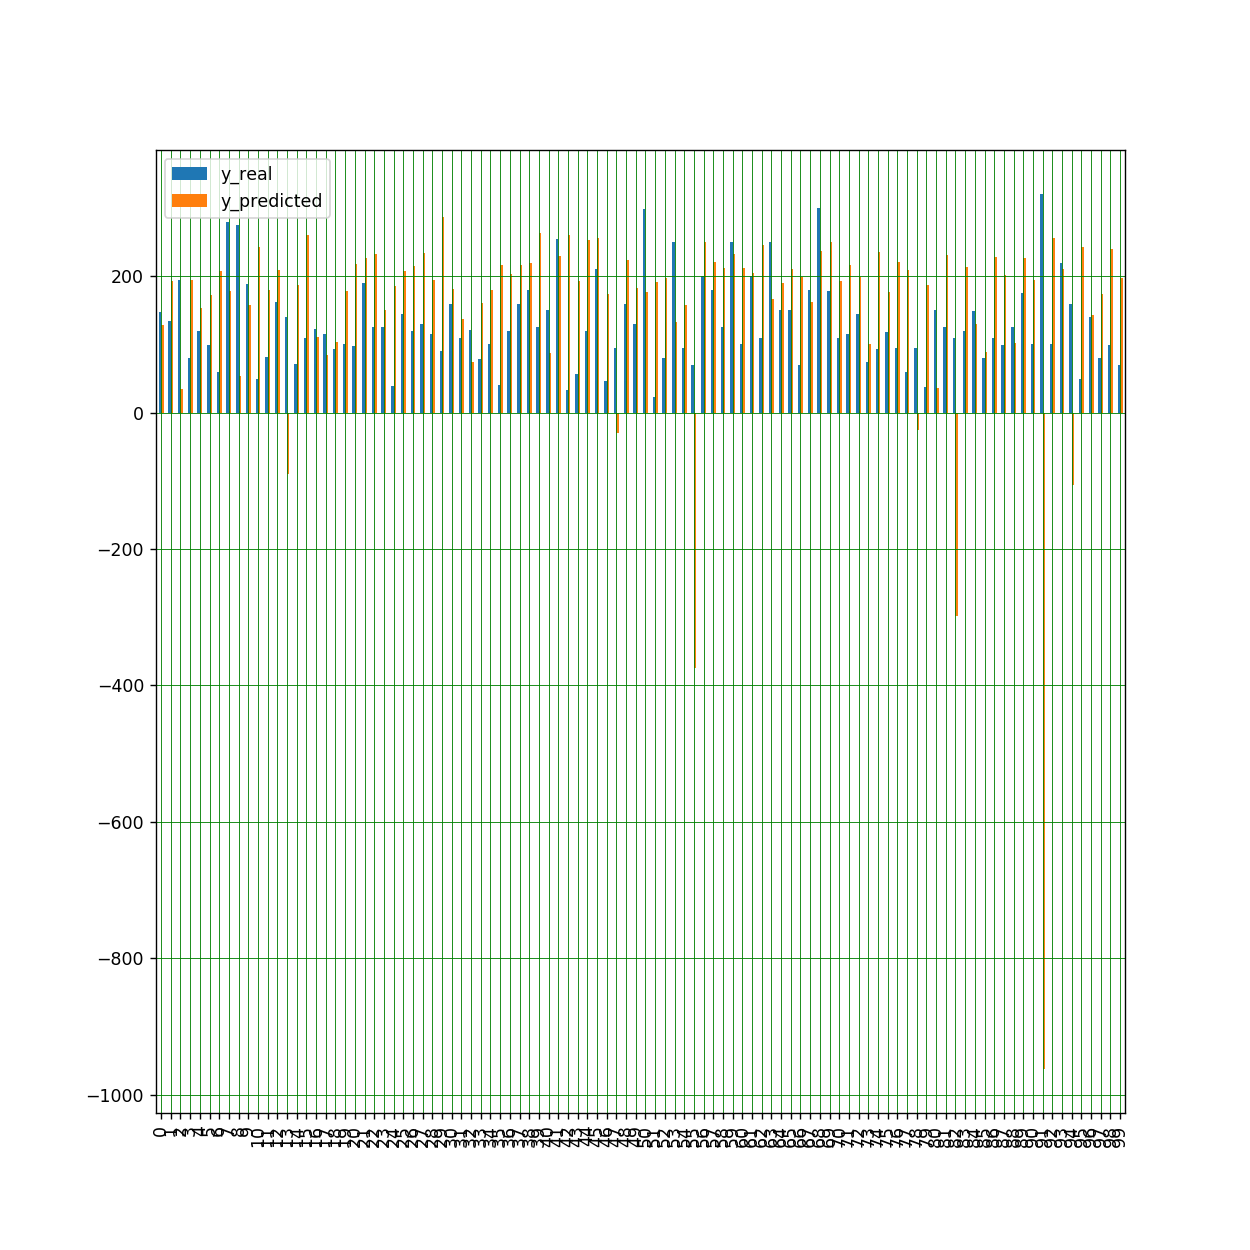

In [45]:
# Linear regression with all features
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train_scaled, y_train)

y_train_predicted = linear_regression.predict(X_train)
y_test_predicted = linear_regression.predict(X_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted)
train_R2 = r2_score(y_train, y_train_predicted)
test_MSD = mean_squared_error(y_test, y_test_predicted)
test_R2 = r2_score(y_test, y_test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


#df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_predicted}, index=range(len(y_train)))
df = y_test.assign(y_predicted=y_test_predicted)
df = df.rename(columns={'59.0' : 'y_real'})
DataFrame(df)


df1 = df.head(100)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


Error mitjà d'entrenament:  4027.3645554622026
Error mitjà de test:  628347.469672312
R2 d'entrenament:  0.00922818118500135
R2 de test:  -152.5985166338784


<IPython.core.display.Javascript object>


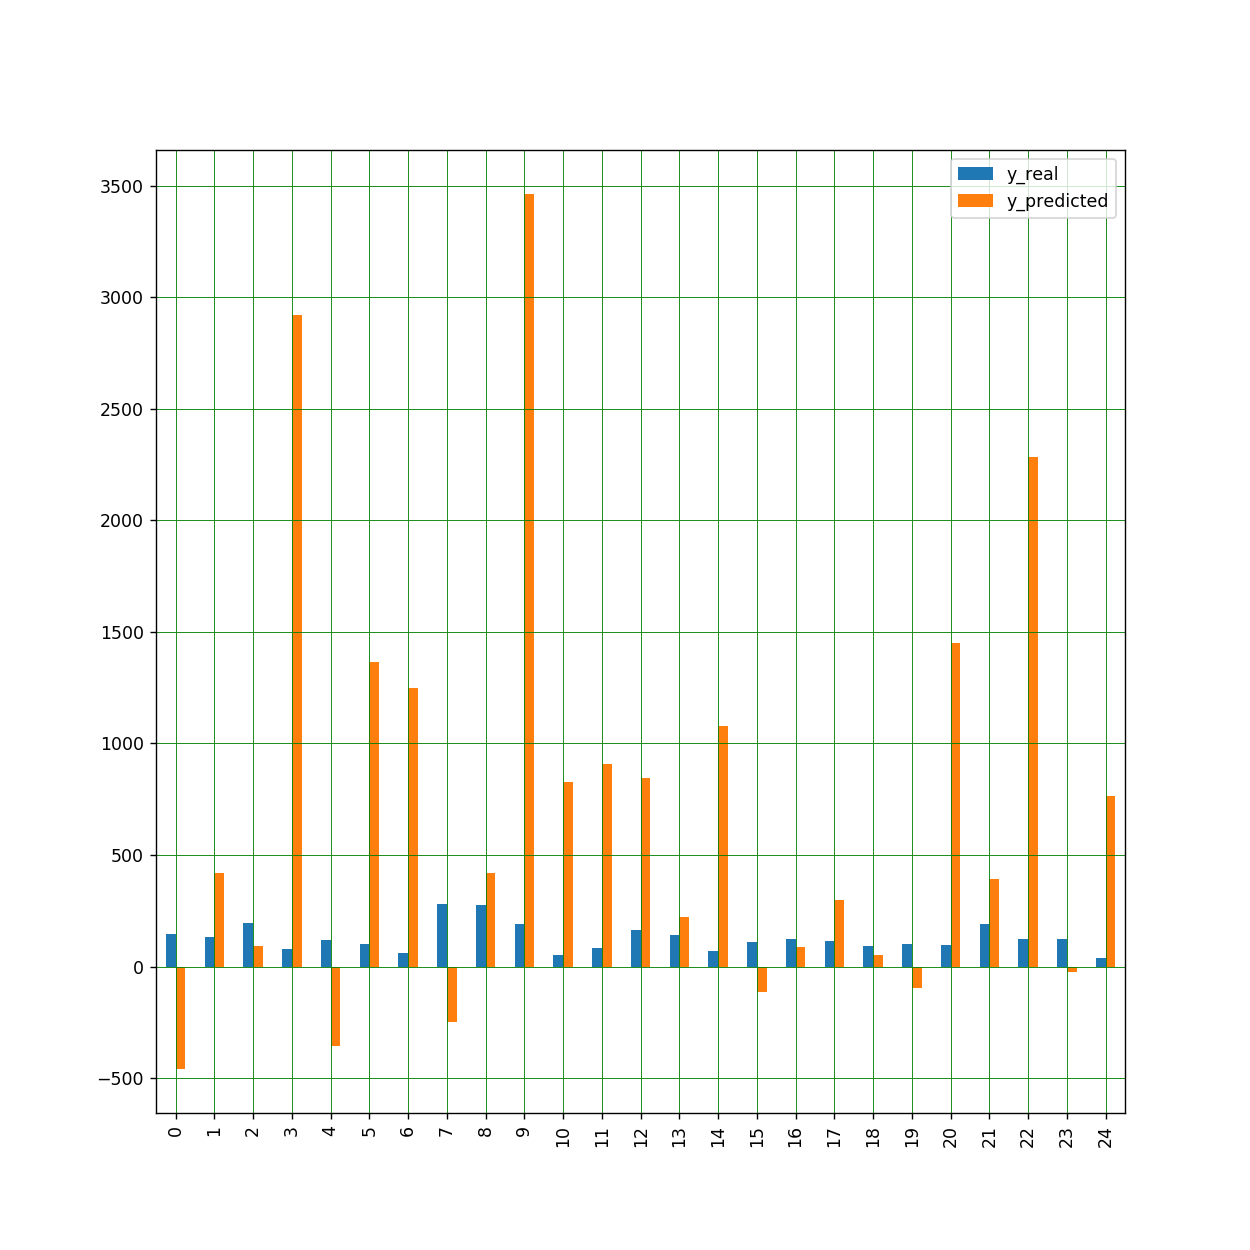

In [46]:
#Multi-featrues polinomial regression with the most correlated featrues
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.fit_transform(X_test_scaled)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)

df = y_test.assign(y_predicted=poly_test_y_predicted)
df = df.rename(columns={'59.0' : 'y_real'})
DataFrame(df)


df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

KNN

In [47]:
from sklearn.neighbors import KNeighborsRegressor
R2_test=[]
R2_train=[]
test_MSD=[]
train_MSD=[]
num=[]
for i in range(1,50,2):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train_scaled, y_train) 
    test_predicted = KNN.predict(X_test)
    train_predicted = KNN.predict(X_train)
    num.append(i)
    test_MSD.append(mean_squared_error(y_test, test_predicted))
    train_MSD.append(mean_squared_error(y_train, train_predicted))
    R2_test.append(r2_score(y_test, test_predicted))
    R2_train.append(r2_score(y_train, train_predicted))

<IPython.core.display.Javascript object>


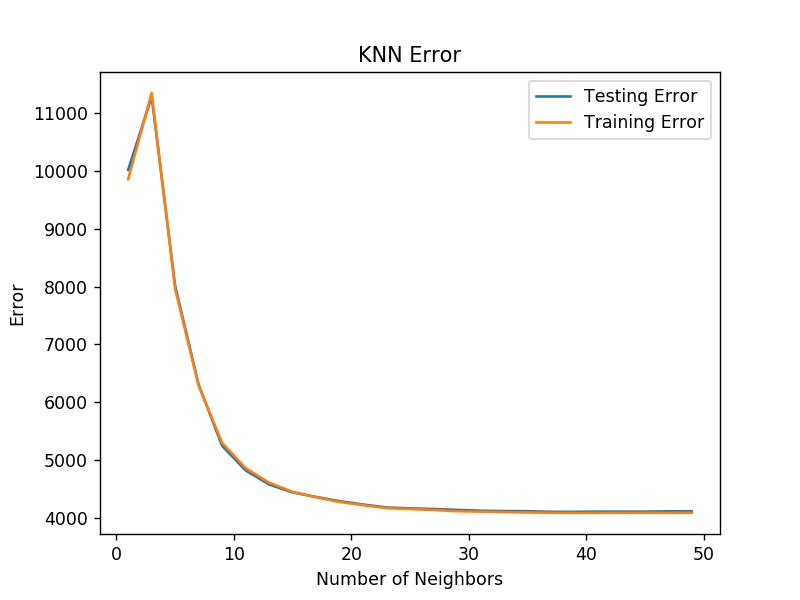

In [48]:
plt.figure()
plt.title('KNN Error')
plt.plot(num, test_MSD, label = 'Testing Error')
plt.plot(num, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

<IPython.core.display.Javascript object>


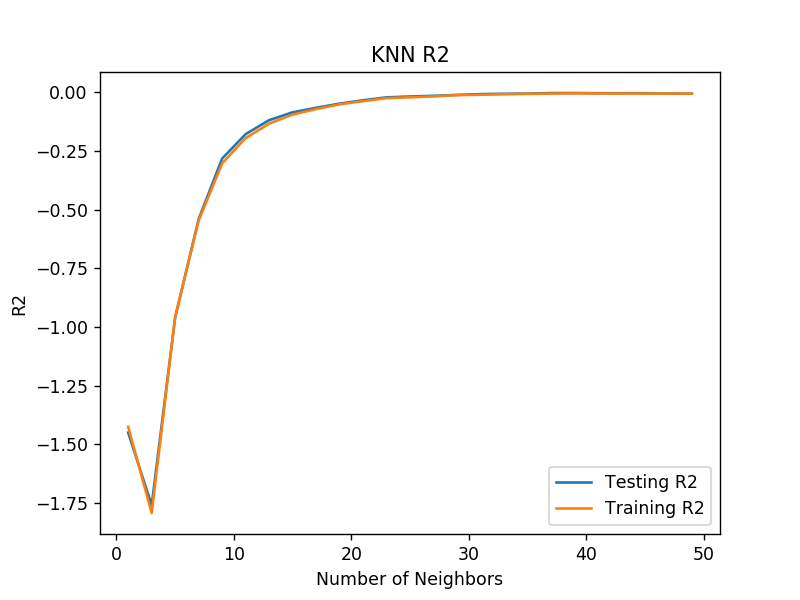

In [49]:
plt.figure()
plt.title('KNN R2')
plt.plot(num, R2_test, label = 'Testing R2')
plt.plot(num, R2_train, label = 'Training R2')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('R2')
plt.show()

Random forest

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Error mitjà d'entrenament:  10473.766421834809
Error mitjà de test:  10301.83362302734
R2 d'entrenament:  -1.5766509251144263
R2 de test:  -1.5182664679643225


<IPython.core.display.Javascript object>


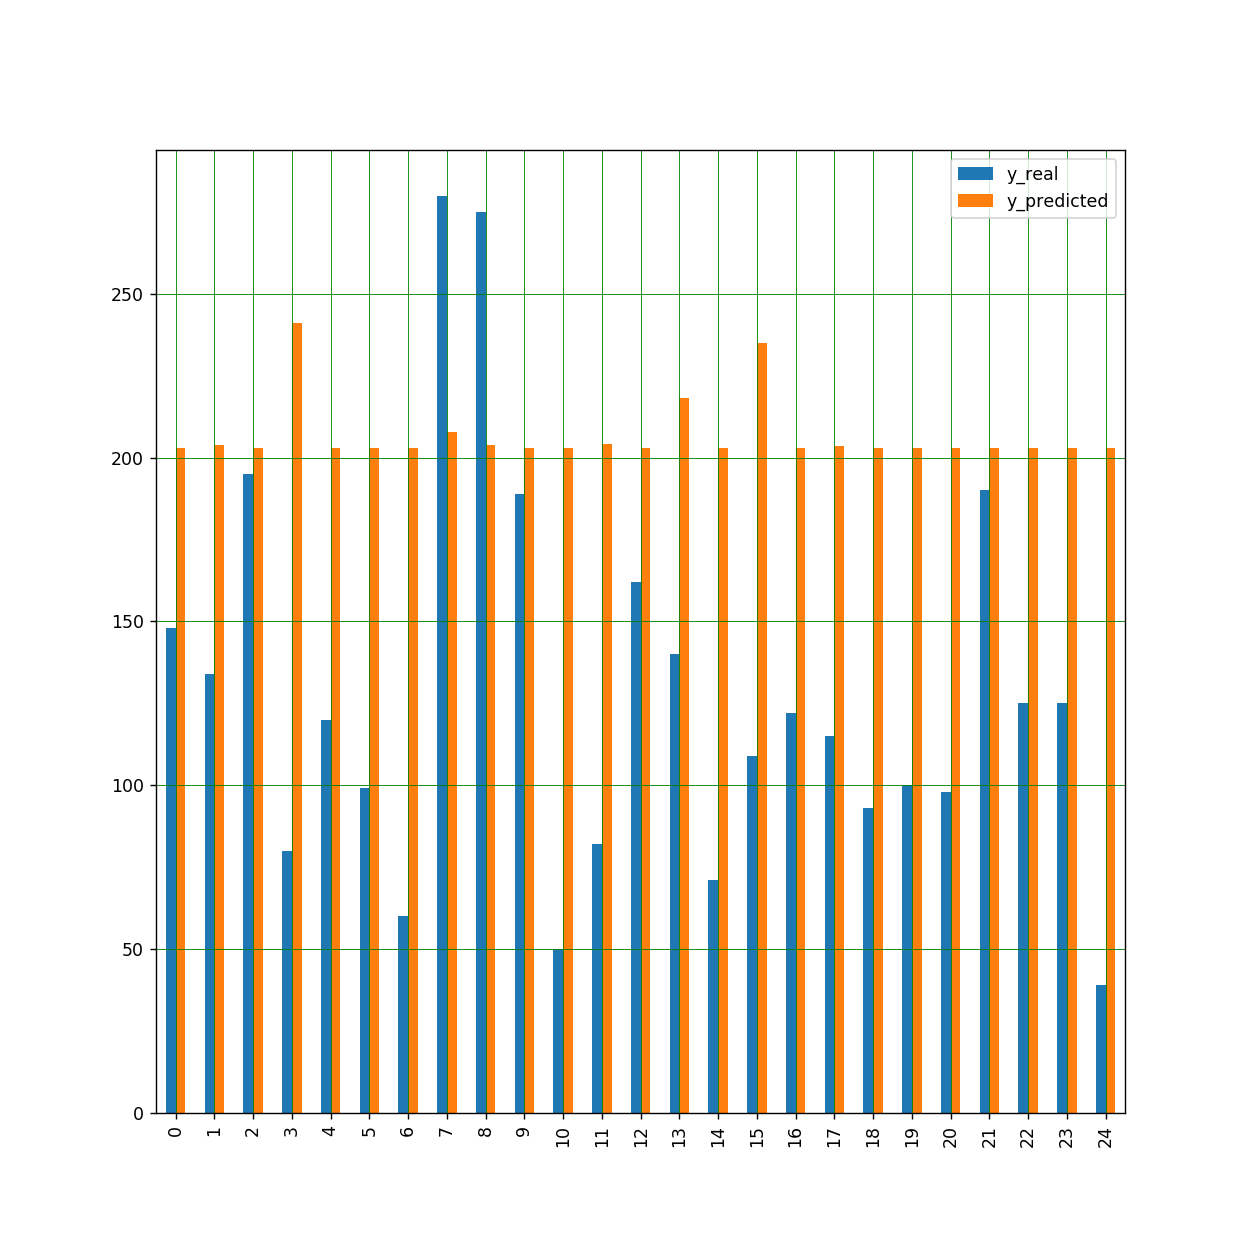

In [50]:
random_forest = RandomForestRegressor() 
random_forest.fit(X_train_scaled, y_train)
test_predicted = random_forest.predict(X_test) 
train_predicted = random_forest.predict(X_train) 
test_predicted=test_predicted.reshape(-1,1)
train_predicted=train_predicted.reshape(-1,1)

train_MSD = mean_squared_error(y_train, train_predicted)
train_R2 = r2_score(y_train, train_predicted)
test_MSD = mean_squared_error(y_test, test_predicted)
test_R2 = r2_score(y_test, test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)

df = y_test.assign(y_predicted=test_predicted)
df = df.rename(columns={'59.0' : 'y_real'})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
